In [1]:
from google.colab import drive
drive.mount("/content/drive")

In [2]:
!mkdir titanic_data

In [3]:
!mv titanic.zip titanic_data

In [4]:
import os
os.chdir("/content/drive/MyDrive/") 

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, Normalizer, MinMaxScaler, StandardScaler
from scipy.sparse import hstack

In [9]:
from sklearn.model_selection import cross_val_score 

In [14]:
#!unzip titanic.zip

In [181]:
!ls

ML-Projects  Titanic_Machine_Learning_from_Disaster.ipynb  train.csv
README.md    titanic_submission.csv
test.csv     titanic.zip


In [16]:
train_data = pd.read_csv('train.csv')
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
print(train_data.shape, test_data.shape)

(891, 12) (418, 11)


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
train_data.isna().values.any()

True

In [22]:
print("Total null values in the train dataset are:\n",train_data.isna().sum().sum())

Total null values in the train dataset are:
 866


In [23]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
print("total null values in test dataset are: \n", test_data.isna().sum().sum())
#Age, Fare & cabin have na values

total null values in test dataset are: 
 414


In [25]:
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(dataset.isna(), cbar=True)

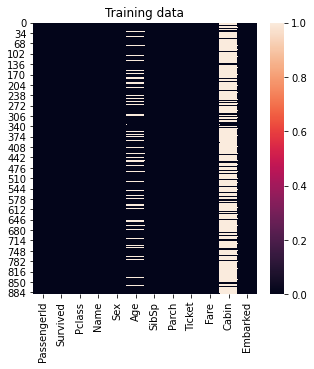

In [26]:
plot_missing_data(train_data, "Training data")

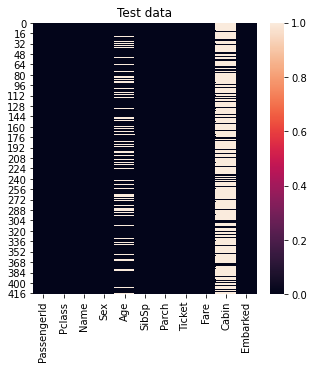

In [27]:
plot_missing_data(test_data, "Test data")

Age and Cabin features have max null values in both train & test datasets

Target Variable analysis:

In [28]:
train_data.Survived.value_counts().to_frame()

,Survived
0,549
1,342


In [29]:
train_data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

61% of people died and only 38% survived the ship wreck

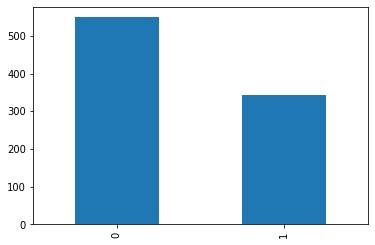

In [30]:
train_data.Survived.value_counts().plot(kind ='bar')

In [31]:
def categorical_visual(feature, data):
  survived = data[data['Survived'] == 1][feature].value_counts()
  dead = data[data['Survived']== 0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index= ['Passengers survived', 'Passengers Died']
  df.plot(kind = 'bar', stacked = True, figsize= (5,5))
  plt.legend(loc="upper right")

#Pclass variable

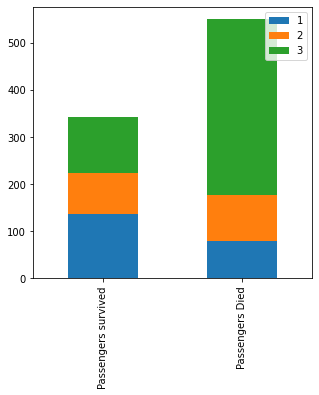

In [32]:
categorical_visual("Pclass", train_data)

In [33]:
train_data.Pclass.isna().values.any()

False

In [34]:
train_data.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Pclass is a categorical var with 3 class, class 1 people survived the most.
Also, there are 55% passengers carrying class 3 ticket & less number of passengers carrying class 1 & 2 tickets i.e only 20 to 24% of total passengers.

### Sex variable:

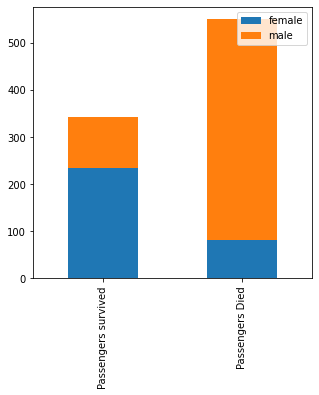

In [35]:
categorical_visual("Sex", train_data)

In [36]:
train_data.Sex.isna().values.any()

False

In [37]:
train_data.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Females have survived in large numbers as compared to males even though there are 64% males and only 35% females among the total passengers 

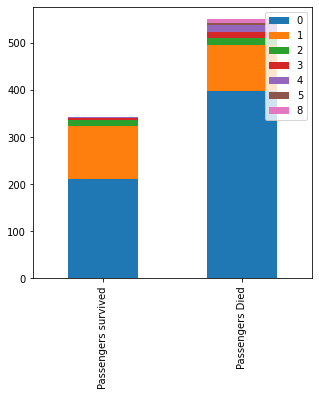

In [38]:
categorical_visual("SibSp", train_data)

Text(0, 0.5, 'Survival Rate')

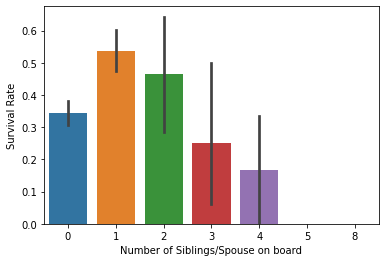

In [39]:
sns.barplot(x='SibSp', y = 'Survived', data=train_data)
plt.xlabel("Number of Siblings/Spouse on board")
plt.ylabel("Survival Rate")

In [40]:
train_data.SibSp.isna().values.any()

False

In [41]:
train_data.SibSp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

People who had more than 2 siblings have not survived much i.e people with less number(<2) or no siblings or only with spouses have survived in large numbers. Also there are 68% of passengers who don't have any siblings or spouse onboard

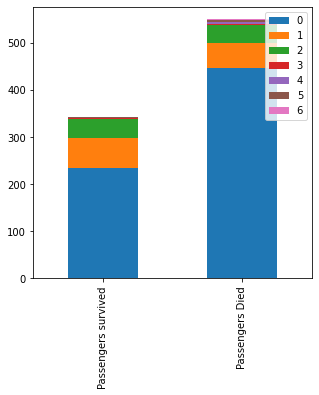

In [42]:
categorical_visual('Parch', train_data)

In [43]:
train_data.Parch.isna().values.any()

False

In [44]:
train_data.Parch.value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

People with more number of family members have died. There are 76% of people who don't have any family members on board. This might be the reason that it was easier for them to get rescued easily than who had thier dependents along.

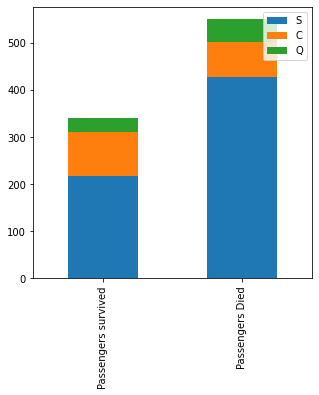

In [45]:
categorical_visual('Embarked', train_data)

In [46]:
train_data.Embarked.isna().values.any()

True

In [47]:
train_data.Embarked.isna().sum()

2

In [48]:
train_data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

There are more number of people fom SouthHampton than Cherbourg or Queens, still the count of survived passengers from SouthHampton is very less.

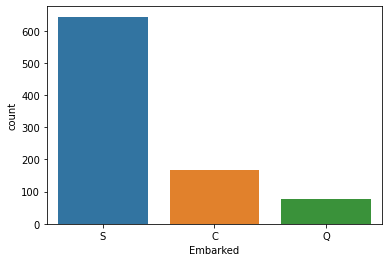

In [49]:
sns.countplot(x='Embarked', data=train_data)

In [50]:
train_data.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


55% people from Cherbourg have survived, followed by 38% from Queens and least have survived from SouthHampton , only 33%. This might have happened due to more number of females or class 1 tickets from Cherbourg.I will try plotting these 2 together to analyse further.

In [51]:
pd.pivot_table(train_data, values='Ticket', index='Survived', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Fare Variable:


In [52]:
train_data.Fare.max()

512.3292

In [53]:
train_data.Fare.min()

0.0

In [54]:
len(train_data[train_data['Fare'] == 0.0])

15

In [55]:
len(test_data[test_data['Fare'] == 0.0])

2

15 Passengers in train data & 2 in test data paid 0 Fare which doesn't make sense, so I will replace it with NaN

In [56]:
train_data.loc[train_data['Fare'] == 0, 'Fare'] = np.NaN
test_data.loc[test_data['Fare'] == 0, 'Fare'] = np.NaN

In [57]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            15
Cabin          687
Embarked         2
dtype: int64

In [58]:
train_data.Fare.mean()

32.75564988584471

In [59]:
test_data.Fare.mean()

35.7988857831325

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


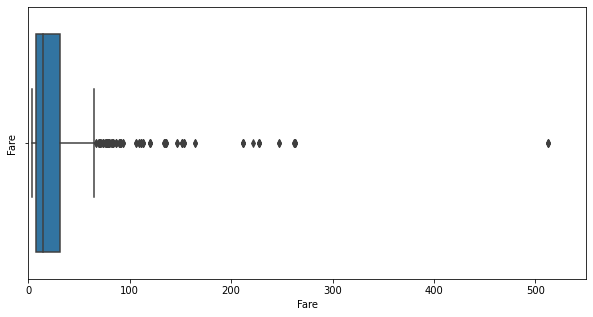

In [60]:
plt.figure(figsize=(10,5))
plt.xlim(0,550)
plt.ylabel('Fare')
sns.boxplot(train_data.Fare)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


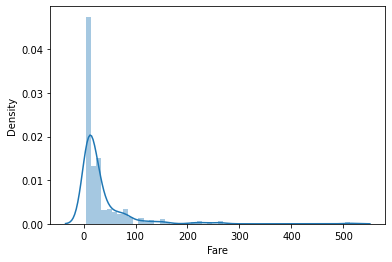

In [61]:
sns.distplot(train_data.Fare, bins= 50)

There are few people who have Fare amount of more than 50, most of them have paid around 30-40 dollars.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


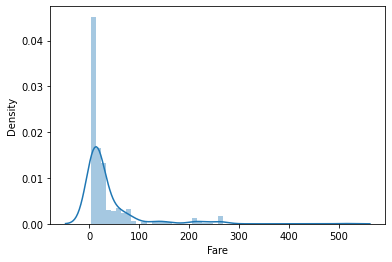

In [62]:
sns.distplot(test_data.Fare, bins= 50)

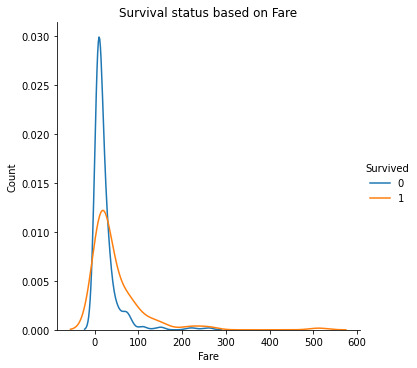

In [63]:
sns.FacetGrid(train_data, hue="Survived", height=5) \
  .map(sns.kdeplot, "Fare") \
  .add_legend()
plt.title("Survival status based on Fare")
plt.ylabel('Count')
plt.show()

People who paid more amount seem to have survived than people who paid less , so there might be a relation between Fare & Class of people with their survival.

Age variable:

In [64]:
train_data.Age.max()

80.0

In [65]:
train_data.Age.mean()

29.69911764705882

In [66]:
test_data.Age.mean()

30.272590361445783

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


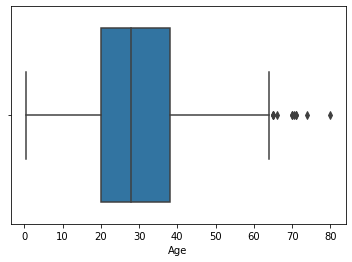

In [67]:
sns.boxplot(train_data.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


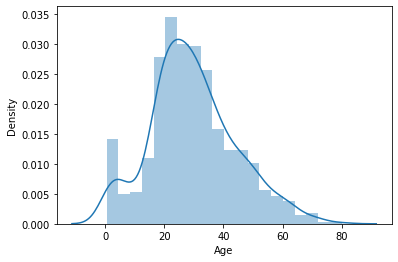

In [68]:
sns.distplot(train_data.Age)

Most of the people on board are around 20 to 40 years old, there are less senior citizens and children. Average age is of 29 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


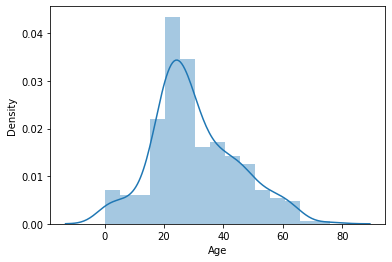

In [69]:
sns.distplot(test_data.Age)

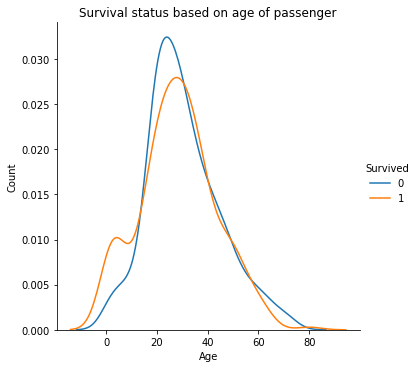

In [70]:
sns.FacetGrid(train_data, hue="Survived", height=5) \
   .map(sns.kdeplot, "Age") \
   .add_legend()
plt.title("Survival status based on age of passenger")
plt.ylabel('Count')
plt.show()

Lets try to do bivariate analysis for more insights.

In [71]:
def bivariate_barplot(data, feature1, feature2, title):
  plt.figure(figsize=(8,5))
  plt.title(title)
  sns.barplot(x = feature1, y = "Survived", hue= feature2, data=data)
  plt.ylabel("Survival rate")

Pclass & Sex:

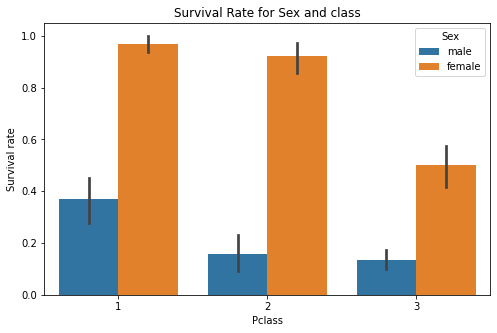

In [72]:
bivariate_barplot(train_data, "Pclass", "Sex", "Survival Rate for Sex and class")

In [73]:
train_data.groupby(['Pclass', 'Sex']).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [74]:
pd.pivot_table(train_data, values='Ticket', columns=['Pclass', 'Sex'], index="Survived",aggfunc='count')

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

From above analysis its clear that Sex and class are important features:
- Overall for all classes , females have survived more than men
- 96% of females who bought class 1 & 92% who bought class 2 tickets have survived, while only 50% of females with class 3 ticket have survived
- Only 36% of males who bought class 1 ticket have survived.

Pclass with Parch & SibSp

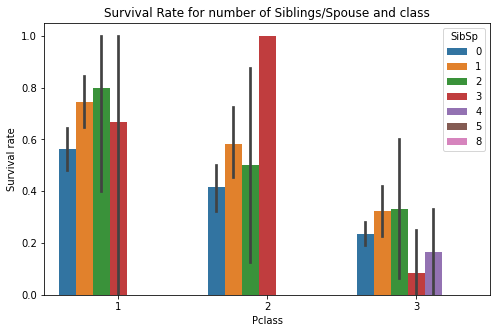

In [75]:
bivariate_barplot(train_data, "Pclass", "SibSp", "Survival Rate for number of Siblings/Spouse and class")

From above analysis its clear that people who bought class 1 tickets have survived along with their family members.

In [76]:
train_data.groupby(['Pclass', 'SibSp']).Survived.mean().to_frame()

Survived
Pclass SibSp          
1      0      0.562044
       1      0.746479
       2      0.800000
       3      0.666667
2      0      0.416667
       1      0.581818
       2      0.500000
       3      1.000000
3      0      0.236467
       1      0.325301
       2      0.333333
       3      0.083333
       4      0.166667
       5      0.000000
       8      0.000000

Its good to know that all people with class 2 ticket and 3 siblings on board have survived (100%)

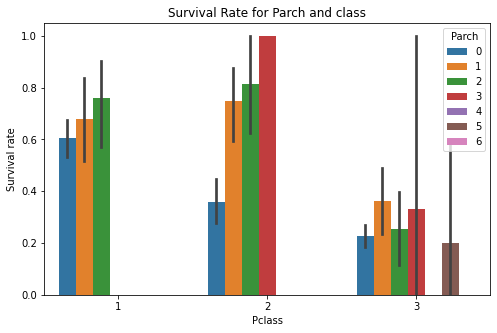

In [77]:
bivariate_barplot(train_data, "Pclass", "Parch", "Survival Rate for Parch and class")

In [78]:
pd.pivot_table(train_data, values='Ticket',index='Survived',columns=['Pclass', 'Parch'],aggfunc='count')

Pclass       1                      2        ...     3                          
Parch        0     1     2    4     0     1  ...     1     2    3    4    5    6
Survived                                     ...                                
0         64.0  10.0   5.0  1.0  86.0   8.0  ...  35.0  32.0  2.0  3.0  4.0  1.0
1         99.0  21.0  16.0  NaN  48.0  24.0  ...  20.0  11.0  1.0  NaN  1.0  NaN

[2 rows x 15 columns]

In [79]:
train_data.groupby(['Pclass', 'Parch']).Survived.mean().to_frame()

Survived
Pclass Parch          
1      0      0.607362
       1      0.677419
       2      0.761905
       4      0.000000
2      0      0.358209
       1      0.750000
       2      0.812500
       3      1.000000
3      0      0.225722
       1      0.363636
       2      0.255814
       3      0.333333
       4      0.000000
       5      0.200000
       6      0.000000

In case of Parch i.e children & grand parents on board, class 2 people seemed to have survived even more than class 1!

Pclass & Embarked:

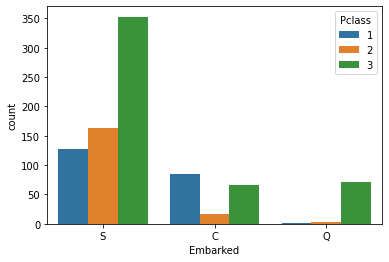

In [80]:
sns.countplot(x = "Embarked", hue="Pclass", data=train_data)

As suspected earlier, majority of passengers who embarked from Cherbourg carried class 1 ticket and mojority embarked from SouthHampton carried class 3 tickets due to which survival rates are higher for Cherbourg. Queens data is not clear from here as there more people who carried class 3 tickets but still more survived than Southhampton, hence I need to analyse it with Sex variable.

Embarked and Sex:


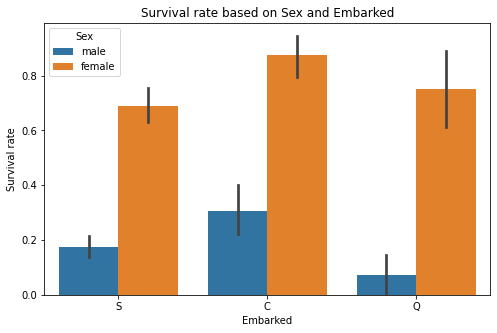

In [81]:
bivariate_barplot(train_data, "Embarked", "Sex", "Survival rate based on Sex and Embarked")

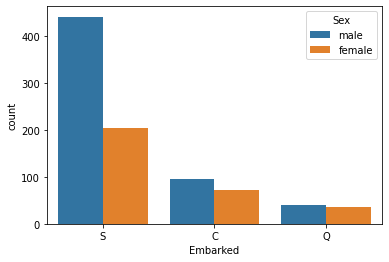

In [82]:
sns.countplot(x="Embarked", hue="Sex", data=train_data)

As seen from above plots, number of females and males is almost same for passengers embarked from Cherbourg & Queens, hence survival rate of Queens passengers is more than SouthHampton where number of males is much higher than number of females

Now we will try to analyse continuous and categorical feature together to understand Age and Fare variables better


Age and Sex:


In [83]:
def swarm_survivors(data, feature1, feature2,title):
  fig, ax = plt.subplots(figsize=(20,5))
  ax.grid(True)
  plt.xticks(list(range(0,100,2)))
  sns.swarmplot(x=feature1, y=feature2, hue="Survived", data=data)
  plt.title(title)

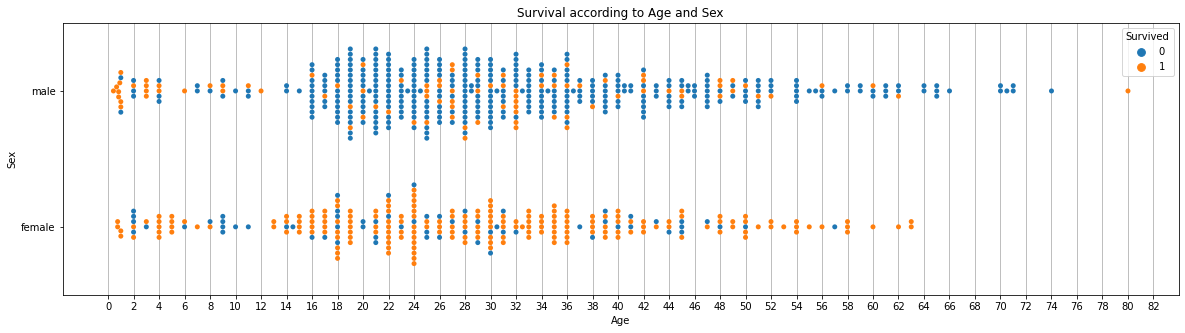

In [84]:
swarm_survivors(train_data, "Age", "Sex", "Survival according to Age and Sex")

Sex seems to be an important feature in differentiating survival. Males in the age from 1 to 12 i.e kids have survived more as compared to adult males & teens. 80 year old man has survived.
Females of almost all ages seem to have survived.

Age & Pclass:


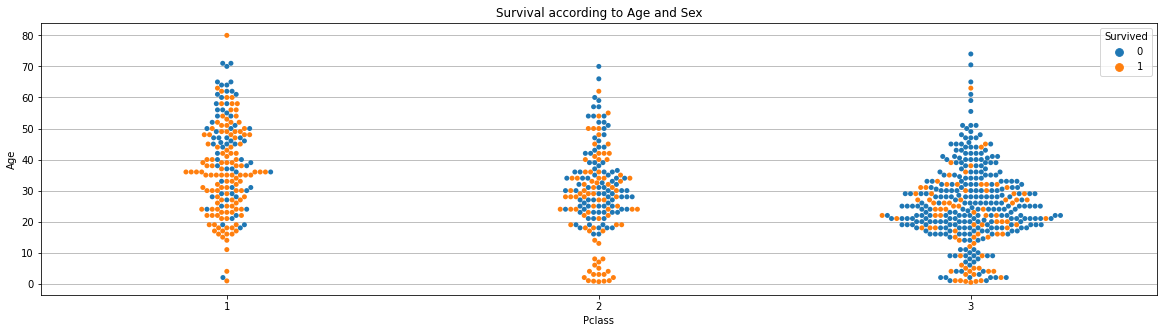

In [85]:
swarm_survivors(train_data, "Pclass", "Age", 'Survival according to Age and Sex')

Pclass is also an important variable. It shows that class 1 people have very few children on board as compared to class 2 and 3. Class 2 has maximum chidren on board. As class 1 people are travelling alone , they have mostly survived.

Fare and Sex:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


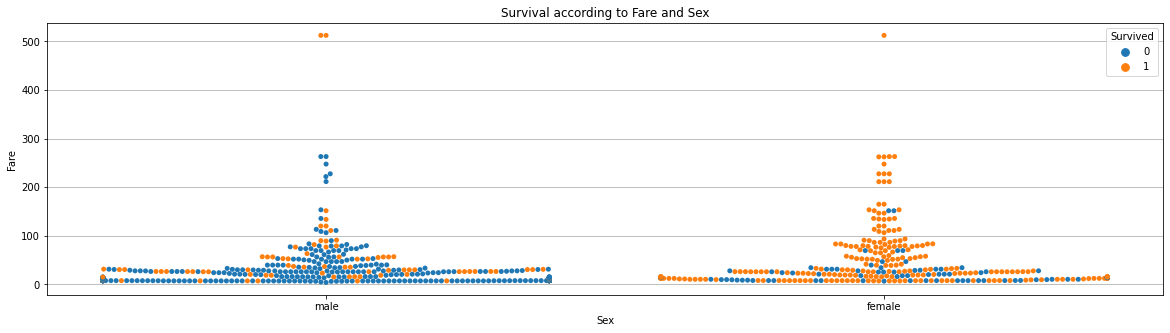

In [86]:
swarm_survivors(train_data, "Sex", "Fare", 'Survival according to Fare and Sex')

As seen from the plot, 
1. Irrespective of gender, all have survived who paid more than 500$.

2. All males who paid between 200 -300$ have died.

3. All females who paid between 200-300 dollars have survived.
4. Most of the males who paid between 0 to 100 dollars have died but most of the females with same fare have survived.
5. 0$ fare needs to be imputed correctly

Fare & Pclass:


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


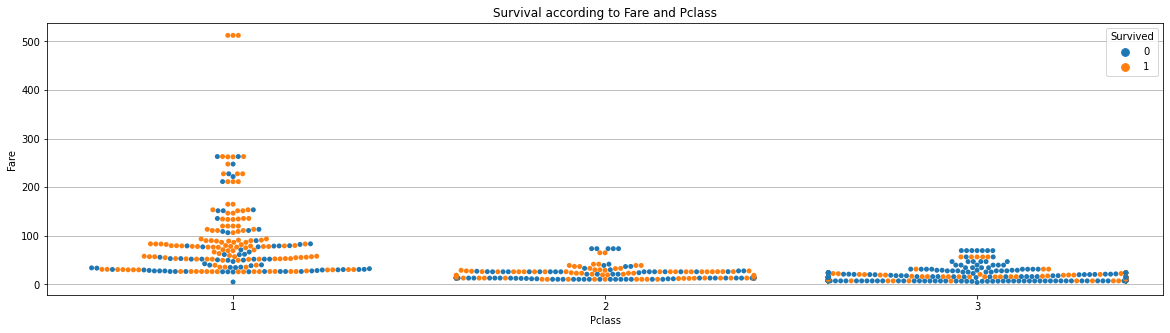

In [87]:
swarm_survivors(train_data, "Pclass", "Fare", 'Survival according to Fare and Pclass')

1. Here, most of the people from class1 have survived as the Fare seems to be higher than class 2 & 3
2. No one has paid more than ~90dollars in class 2 and 3.
3. Class 2 & 3 fare seems to be almost similar , but still more people from class3 have died, this might be confusing for the model. Fare and Sex seems to be better differentiating the survivals

Feature Engineering:

In [88]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Combine SibSp & parch as both represent number of family members

In [89]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


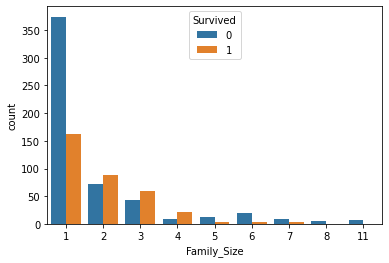

In [90]:
sns.countplot(x='Family_Size', hue= "Survived",data=train_data)

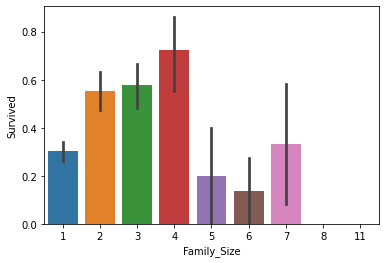

In [91]:
sns.barplot(x='Family_Size', y= "Survived", data=train_data)

In [92]:
train_data.Family_Size.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [93]:
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


Name :


I will be extracting titles from names which can be used as a useful feature

In [94]:
train_data.Name[0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [95]:
train_data['Title'] = train_data['Name'].apply(lambda x : x.split(sep=',')[1].split(sep='.')[0].strip())

In [96]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1440 with 0 Axes>

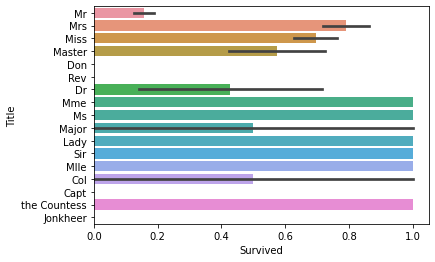

<Figure size 2880x1440 with 0 Axes>

In [97]:
#analyze new title feature
sns.barplot("Survived", "Title", data=train_data)
plt.figure(figsize=(40,20))

In [98]:
train_data.Title.value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Col,2
Mlle,2
the Countess,1


In [99]:
train_data.Title.replace(['Ms', 'Lady', 'the Countess', 'Mme', 'Mlle'], 'Miss', inplace=True)
train_data.Title.replace(['Jonkheer', 'Sir', 'Don', 'Capt', 'Major', 'Col'], 'Mr', inplace=True)

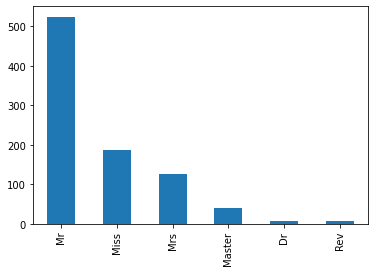

In [100]:
train_data.Title.value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


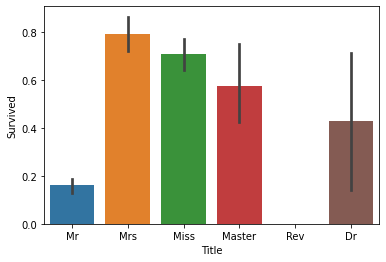

In [101]:
sns.barplot('Title', 'Survived', data=train_data)

As seen,
1. Females have survived the most
2. Doctors too have survived in large numbers ~42%
3. 18% of males have survived
4. Master i.e male kids have surprisingly ~58% survival rate
5. 6 Revernands have died.

In [102]:
test_data['Title'] = test_data['Name'].apply(lambda x : x.split(sep=',')[1].split(sep='.')[0].strip())

In [103]:
test_data.Title.replace(['Ms', 'Dona'], 'Miss', inplace=True)
test_data.Title.replace(['Col'], 'Mr', inplace=True)

In [104]:
test_data.Title.value_counts()

Mr        242
Miss       80
Mrs        72
Master     21
Rev         2
Dr          1
Name: Title, dtype: int64

Impute NA values of Age & Fare features:

In [105]:
mean_age = train_data.Age.mean()
print(round(mean_age))

30


As seen before under Age plot, its distribution is not exactly a normal one , but most of the people are between 20 to 40 years old, hence I am taking mean value as a substitute for NaNs in this feature

In [106]:
train_data.Age.replace(np.NaN, round(mean_age),inplace=True)
test_data.Age.replace(np.NaN, round(test_data.Age.mean()), inplace=True)

In [107]:
train_data.Age.isna().values.any()

False

In [108]:
test_data.Age.isna().values.any()

False

Fare feature's distribution was extremely left skewed so, replacing NaNs with median will be more useful as median is not much affected by outliers in the data

In [109]:
med_Fare = train_data.Fare.median()
print(med_Fare)

14.5


In [110]:
train_data.Fare.isna().sum()

15

In [111]:
train_data.Fare.replace(np.NaN,med_Fare,inplace=True)
test_data.Fare.replace(np.NaN, test_data.Fare.median(), inplace=True)

In [112]:
train_data.Fare.isna().values.any()

False

In [113]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family_Size      0
Title            0
dtype: int64

In [114]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
Title            0
dtype: int64

In [115]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [116]:
train_data.Embarked.replace(np.NaN, 'S', inplace=True)

Modelling:

In [117]:
cat_cols = ['Pclass', 'Sex', 'Family_Size', 'Title', 'Embarked']
numeric_cols = ['Age', 'Fare']

In [118]:
def num_encode(input_num):
  arr_num = np.asarray(input_num)
  arr_num = arr_num.reshape(-1,1)
  enc = MinMaxScaler()
  num_enc = enc.fit_transform(arr_num)
  return num_enc

In [119]:
num_enc = []
for i in numeric_cols:
  num_cat_enc = num_encode(train_data[i])
  print("Feature {0}, shape{1}\n".format(i, num_cat_enc.shape))
  num_enc.append(num_cat_enc)

Feature Age, shape(891, 1)

Feature Fare, shape(891, 1)



In [120]:
num_enc_test = []
for i in numeric_cols:
  num_cat_test = num_encode(test_data[i])
  print("Feature {0}, shape{1}\n".format(i, num_cat_test.shape))
  num_enc_test.append(num_cat_test)

Feature Age, shape(418, 1)

Feature Fare, shape(418, 1)



In [121]:
#One hot encode categorical columns
def onehot(input_cat):
  arr_cat = np.asarray(input_cat)
  arr_cat = arr_cat.reshape(-1,1)
  encoded = OneHotEncoder(handle_unknown='ignore')
  input_cat_enc = encoded.fit_transform(arr_cat)
  
  return input_cat_enc

In [122]:
cat_cols_enc = []
for i in cat_cols:
  onehot_col = onehot(train_data[i])
  print("Feature {0}, shape{1}\n".format(i, onehot_col.shape))
  cat_cols_enc.append(onehot_col)

Feature Pclass, shape(891, 3)

Feature Sex, shape(891, 2)

Feature Family_Size, shape(891, 9)

Feature Title, shape(891, 6)

Feature Embarked, shape(891, 3)



In [123]:
cat_test_enc = []
for i in cat_cols:
  onehot_col_test = onehot(test_data[i])
  print("Feature {0}, shape{1}\n".format(i, onehot_col_test.shape))
  cat_test_enc.append(onehot_col_test)

Feature Pclass, shape(418, 3)

Feature Sex, shape(418, 2)

Feature Family_Size, shape(418, 9)

Feature Title, shape(418, 6)

Feature Embarked, shape(418, 3)



In [124]:
#normalize numerical variables


In [125]:
#del train_enc

In [126]:
#del train_enc
#del test_enc

In [127]:
train_enc = hstack((cat_cols_enc[0], cat_cols_enc[1], cat_cols_enc[2], \
                    cat_cols_enc[3], cat_cols_enc[4], num_enc[0], num_enc[1]))

In [128]:
test_enc = hstack((cat_test_enc[0], cat_test_enc[1], cat_test_enc[2], \
                    cat_test_enc[3], cat_test_enc[4], num_enc_test[0], num_enc_test[1]))

In [129]:
train_enc.shape

(891, 25)

In [130]:
test_enc.shape

(418, 25)

In [131]:
y_train = np.asarray(train_data.Survived)
print(y_train.shape)

(891,)


In [132]:
X_train, X_cv, y_train, y_cv = train_test_split(train_enc, y_train, test_size=0.30, stratify=y_train)

In [133]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(623, 25) (623,)
(268, 25) (268,)


In [134]:
rf_new = RandomForestClassifier(random_state=0, n_estimators=750, max_depth=5)

In [135]:
rf_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
rf_new.score(X_train,y_train)

0.8571428571428571

In [137]:
cross_val_score(rf_new, X_train, y_train, cv=8).mean()

0.8201590076590076

In [138]:
y_rf = rf_new.predict(X_cv)

In [139]:
confusion_matrix(y_cv, y_rf)

array([[149,  16],
       [ 28,  75]])

In [165]:
log_clf = LogisticRegression(C = 1)

In [166]:
log_clf.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:

log_clf.score(X_train, y_train)

0.826645264847512

In [168]:
pred_log = log_clf.predict(test_enc)

In [140]:
predictions = rf_new.predict(test_enc)

In [169]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_log})
output.to_csv('titanic_submission.csv', index=False)

In [170]:
out = pd.read_csv('titanic_submission.csv')
out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [153]:
out.shape

(418, 2)

In [154]:
test_data.shape

(418, 13)

Test data score at Kaggle achieved is 77.751% using logistic regression & 77% using Random Forest